#### Reading Stocks

In [27]:
# loading packages (pip/pip3 list for new packages) - https://github.com/akfamily/akshare
# pip install akshare --upgrade
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import akshare as ak 

plt.rcParams['font.sans-serif'] = 'Arial Unicode MS' #显示中文
plt.rcParams['axes.unicode_minus'] = False 

In [15]:
df_raw = ak.stock_zh_a_spot()

In [18]:
df_raw.columns

Index(['代码', '名称', '最新价', '涨跌额', '涨跌幅', '买入', '卖出', '昨收', '今开', '最高', '最低',
       '成交量', '成交额', '时间戳'],
      dtype='object')

In [19]:
df_raw.head

<bound method NDFrame.head of             代码    名称     最新价    涨跌额    涨跌幅      买入      卖出      昨收      今开  \
0     bj430017  星昊医药   12.82   0.03  0.235   12.81   12.82   12.79   12.89   
1     bj430047  诺思兰德   14.34  -0.17 -1.172   14.33   14.34   14.51   14.48   
2     bj430090  同辉信息    3.49  -0.01 -0.286    3.49    3.50    3.50    3.47   
3     bj430139  华岭股份   12.06   0.15  1.259   12.06   12.09   11.91   11.99   
4     bj430198  微创光电    8.64   0.01  0.116    8.63    8.64    8.63    8.65   
...        ...   ...     ...    ...    ...     ...     ...     ...     ...   
5347  sz301568   思泰克   41.93   0.96  2.343   41.93   41.94   40.97   43.44   
5348  sz301577  美信科技   59.00   1.81  3.165   59.00   59.01   57.19   57.60   
5349  sz301578  辰奕智能   54.17  -0.98 -1.777   54.17   54.18   55.15   54.31   
5350  sz301589  诺瓦星云  430.80  12.79  3.060  430.80  430.99  418.01  417.05   
5351  sz301591  肯特股份   51.91  -1.50 -2.808   51.91   51.92   53.41   52.20   

          最高      最低        成交量  

In [20]:
df = df_raw[['代码','名称']].copy()
df.rename(columns={'代码': 'symbol', '名称': 'name'}, inplace=True)
symbol_name_dict = df.set_index('symbol')['name'].to_dict()
# symbol_name_dict.get('sh600029')

In [34]:
today = datetime.now().date().strftime("%Y-%m-%d")
start_date, end_date ="2023-06-01",today
stock_list = ['sh600887','sh600009','sh600029','sh600004','sz000651']

def get_signal(stock_index):

    stock_data = ak.stock_zh_a_daily(symbol=stock_index, start_date=start_date, end_date=end_date)
    # 计算5日和20日均线
    stock_data["ma5"] = stock_data["close"].rolling(window=5).mean()
    stock_data["ma20"] = stock_data["close"].rolling(window=20).mean()
    # 生成买入/卖出信号（ma5向上穿越ma20/ma5向下穿越ma20）
    stock_data["buy_signal"] = (stock_data["ma5"] > stock_data["ma20"]) & (stock_data["ma5"].shift(1) <= stock_data["ma20"].shift(1))
    stock_data["sell_signal"] = (stock_data["ma5"] < stock_data["ma20"]) & (stock_data["ma5"].shift(1) >= stock_data["ma20"].shift(1))

    return stock_data

##### Visualisation

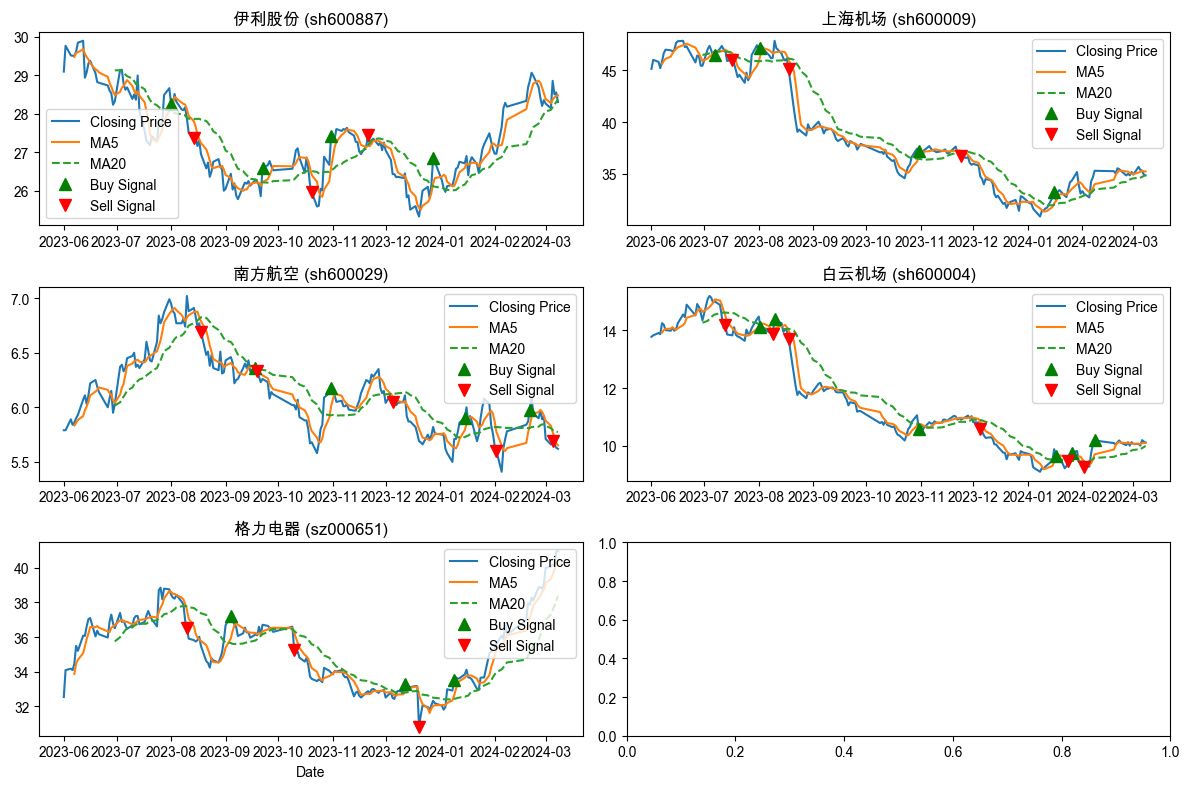

In [35]:
# Create a figure and axes for the subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 8))  # 3 rows, 2 columns

for i, stock_index in enumerate(stock_list):
    stock_data = get_signal(stock_index)
    stock_name = symbol_name_dict.get(stock_index)
    # print(f'{stock_name}: {stock_index}\n')
    
    # Calculate the subplot position
    row = i // 2  # Determine the row index
    col = i % 2   # Determine the column index
    
    # Retrieve the corresponding subplot axes
    ax = axs[row, col]

    # Convert the index into datetime
    stock_data.index = pd.to_datetime(stock_data['date'], format='%Y-%m-%d')
    
    # Plot the closing prices
    ax.plot(stock_data.index, stock_data["close"], label="Closing Price")
    
    # Plot the moving averages (ma5 and ma20)
    ax.plot(stock_data.index, stock_data["ma5"], linestyle='-', label="MA5")
    ax.plot(stock_data.index, stock_data["ma20"], linestyle='--', label="MA20")
    
    # Plot the buy and sell signals
    ax.plot(stock_data[stock_data['buy_signal']]['date'], stock_data[stock_data['buy_signal']]['close'], 'g^', markersize=8, label='Buy Signal')
    ax.plot(stock_data[stock_data['sell_signal']]['date'], stock_data[stock_data['sell_signal']]['close'], 'rv', markersize=8, label='Sell Signal')

    # Set the subplot title and legend
    ax.set_title(f"{stock_name} ({stock_index})")
    ax.legend()
    
    # Set the x-axis label only for the bottom subplots
    if row == 2:
        ax.set_xlabel("Date")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [55]:
stock_list = ['sh600887','sh600009','sh600029','sh600004','sz000651']
stock_data = ak.stock_zh_a_daily(symbol=stock_list[1], start_date=start_date, end_date=end_date)
stock_data

,date,open,high,low,close,volume,amount,outstanding_share,turnover
0,2024-01-02,32.94,32.99,32.11,32.18,7846064.0,253541002.0,1.926958e+09,0.004072
1,2024-01-03,32.28,32.34,31.90,32.15,5984059.0,192097418.0,1.926958e+09,0.003105
2,2024-01-04,32.10,32.12,31.50,31.67,6490787.0,205648828.0,1.926958e+09,0.003368
3,2024-01-05,31.62,32.05,31.37,31.45,7167529.0,227099220.0,1.926958e+09,0.003720
4,2024-01-08,31.45,31.54,30.74,30.89,7958232.0,246583954.0,1.926958e+09,0.004130
5,2024-01-09,30.95,31.85,30.81,31.43,9092060.0,285003363.0,1.926958e+09,0.004718
6,2024-01-10,31.25,31.80,30.89,31.45,6195534.0,194643530.0,1.926958e+09,0.003215
7,2024-01-11,31.33,31.76,31.31,31.67,7295222.0,230395879.0,1.926958e+09,0.003786
8,2024-01-12,31.67,32.14,31.40,31.75,8169630.0,259989631.0,1.926958e+09,0.004240
9,2024-01-15,31.72,32.97,31.57,32.70,14320904.0,465730334.0,1.926958e+09,0.007432


##### Visualisation

In [14]:
# 获取A股指数数据
a_share_data = ak.stock_zh_index_daily(index="sz000001", start_date=start_date, end_date=end_date)

# 获取美股指数数据
us_stock_data = ak.stock_us_daily(symbol="DJI", start_date=start_date, end_date=end_date)

# 绘制A股和美股指数比较图
plt.figure(figsize=(12, 6))
plt.plot(a_share_data["date"], a_share_data["close"], label="A股指数")
plt.plot(us_stock_data["date"], us_stock_data["close"], label="美股指数")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("A股和美股指数比较")
plt.legend()
plt.show()

TypeError: stock_zh_index_daily() got an unexpected keyword argument 'index'

##### # read more on https://zhuanlan.zhihu.com/p/678521592